In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import six
from matplotlib.backends.backend_pdf import PdfPages

# Add UID to complete list

In [ ]:
#midterm_list = pd.read_csv('wus_midterm_users_and_passwords.csv')
klausur_list = pd.read_excel('Anmeldungen.xlsx')
all_list = pd.read_excel('al-grundlagenvonwahrscheinlichkeitstheorieundstatistik.xls')

In [ ]:
df = pd.DataFrame(columns=['Name','FB02UID','Matrikel','Raum','Platz','Date'])
for i in range(len(klausur_list)):        
    exam_matrikel = klausur_list.Matrikel[i]
    exam_nachname = klausur_list.Nachname[i]
    exam_vorname = klausur_list.Vorname[i]
    exam_name = exam_vorname + ' ' + exam_nachname
    exam_raum = klausur_list.Raum[i]
    exam_platz = klausur_list.Platz[i]
    date = "22.03.2019"
    #print (exam_matrikel, exam_nachname, exam_nachname, exam_raum, exam_platz)
    
    for j in range(len(all_list)):
        fb02_matrikel = all_list.Matrikel[j]
        fb02_uid = all_list.UID[j]
        fb02_uid = fb02_uid.replace(" ", "")
        if fb02_matrikel == exam_matrikel:
            df_new = pd.DataFrame([[exam_name,fb02_uid,exam_matrikel,exam_raum,exam_platz,date]], 
                            columns=['Name','FB02UID','Matrikel','Raum','Platz','Date'])
            df = df.append(df_new, ignore_index=True)

df.to_csv('exam_complete_list.csv', index=False)

# Update Platz and Raum

In [ ]:
final_list = pd.read_csv('wus_final_username_and_password.csv')
updated_list = pd.read_excel('Anmeldungen_final.xlsx')

df = pd.DataFrame(columns=['Name','FB02UID','Username','Password','Matrikel','Raum','Platz','Date','Session'])
for i in range(len(final_list)):
    final_name = final_list.Name[i]
    final_fb02uid = final_list.FB02UID[i]
    final_username = final_list.Username[i]
    final_password = final_list.Password[i]
    final_matrikel = final_list.Matrikel[i]
    final_raum = final_list.Raum[i]
    final_platz = final_list.Platz[i]
    final_date = final_list.Date[i]
    
    for j in range(len(updated_list)):
        fb02_matrikel = updated_list.Matrikel[j]
        fb02_uid = updated_list.FB02UID[j]
        fb02_uid = fb02_uid.replace(" ", "")
        fb02_raum = updated_list.Raum[j]
        fb02_platz = updated_list.Platz[j]
        fb02_session = updated_list.Session[j]
        if (int(final_matrikel) == int(fb02_matrikel)):
            #print (final_fb02uid, fb02_uid)
            #print (int(final_matrikel), int(fb02_matrikel))
            df_new = pd.DataFrame([[final_name,final_fb02uid,final_username, final_password,
                                    final_matrikel,fb02_raum,fb02_platz,final_date, fb02_session]], 
                            columns=['Name','FB02UID','Username','Password','Matrikel','Raum','Platz','Date','Session'])
            df = df.append(df_new, ignore_index=True)
            #print ("Got", final_fb02uid)
            
df.to_csv('wus_final_username_and_password_new.csv', index=False)

# Create attendance list
#### Create attendance list during the exam based

In [ ]:
import pandas as pd
import numpy as np

time = '15.30-18.00'
root_dir = '/home/wus/resources/wus_midterm_ws19'
final_list = pd.read_csv('{}/{}-list-output.csv'.format(root_dir, time))
#updated_list = pd.read_excel('Anmeldungen_final.xlsx')

df_1 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
df_2 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
df_3 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
raumen = ['C063', 'C175', 'C177']
for i in range(len(final_list)):
    final_name = final_list.Name[i]
    final_raum = final_list.Raum[i].strip()
    final_platz = final_list.Platz[i]
    final_sess = time
    #print (final_sess)
    if final_raum == raumen[0]:
        df_new_1 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ','']], 
                        columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
        df_1 = df_1.append(df_new_1, ignore_index=True)
    
    if final_raum == raumen[1]:
        df_new_2 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ','']], 
                        columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
        df_2 = df_2.append(df_new_2, ignore_index=True)
    
    if final_raum == raumen[2]:
        df_new_3 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ','']], 
                        columns=['Name','Raum/Platz','Zeit','Unterschrift','Abgegeben','Info'])
        df_3 = df_3.append(df_new_3, ignore_index=True)

#df_1 = df_1.sort_values(['Sess'])     
df_1.to_csv('{}/attendance_{}_{}.csv'.format(root_dir, raumen[0],time), index=False)
#df_2 = df_2.sort_values(['Sess'])
df_2.to_csv('{}/attendance_{}_{}.csv'.format(root_dir, raumen[1],time), index=False)
#df_3 = df_3.sort_values(['Sess'])
df_3.to_csv('{}/attendance_{}_{}.csv'.format(root_dir, raumen[2],time), index=False)

In [ ]:
df_1

# Hashcode list
#### Usage: after the exam students need to write down their hashcode on this list with their signature

In [ ]:
import pandas as pd
import numpy as np

time = '15.30-18.00'
root_dir = '/home/wus/resources/wus_midterm_ws19'
final_list = pd.read_csv('{}/{}-list-output.csv'.format(root_dir, time))

df_1 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
df_2 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
df_3 = pd.DataFrame(columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
raumen = ['C063', 'C175', 'C177']

for i in range(len(final_list)):
    final_name = final_list.Name[i]
    final_raum = final_list.Raum[i].strip()
    final_platz = final_list.Platz[i]
    final_sess = time
    #print (final_sess)
    if final_raum == raumen[0]:
        df_new_1 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ']], 
                        columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
        df_1 = df_1.append(df_new_1, ignore_index=True)
    
    if final_raum == raumen[1]:
        df_new_2 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ']], 
                        columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
        df_2 = df_2.append(df_new_2, ignore_index=True)
    
    if final_raum == raumen[2]:
        df_new_3 = pd.DataFrame([[final_name,final_raum+'/'+str(final_platz),final_sess,' ', ' ']], 
                        columns=['Name','Raum/Platz','Zeit','Hashcode','Unterschrift'])
        df_3 = df_3.append(df_new_3, ignore_index=True)

df_1.to_csv('{}/hashcode_{}_{}.csv'.format(root_dir, raumen[0],time), index=False)
df_2.to_csv('{}/hashcode_{}_{}.csv'.format(root_dir, raumen[1],time), index=False)
df_3.to_csv('{}/hashcode_{}_{}.csv'.format(root_dir, raumen[2],time), index=False)

# Exam sheet generation (CSV to PDF)

#### Create a pdf of the student information (e.g. Username, password, hashcode, exam info, etc) for every user
#### This code will generate a pdf containing the student information on a single page

In [1]:
from typing import Sequence
import pandas as pd
import numpy as np
import six
import imageio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def generate_exam_sheet(data: pd.core.frame.DataFrame,
                        info:pd.core.frame.DataFrame,
                        course_name: str=None,
                        semester: str =None,
                        col_width: float=9.5,
                        row_height: float=7.225,
                        font_size: float=28,
                        header_color: str='#dddddd',
                        row_colors: Sequence[str]=['#f1f1f2', 'w'],
                        edge_color: str='w',
                        bbox: Sequence[float]=[0., 0., 0.9, 1.],
                        header_columns: int=0,
                        axes: Sequence=None,
                        take_home_sheet: bool=False,
                        **kwargs) -> matplotlib.figure.Figure:
    '''Returns a matplotlib figure that displays an exam sheet.
    The sheet includes:
        * the university logo on top,
        * the name of the course and the semester in which the exam is conducted
        * the student name and login information
        * information about the date and location of the exam for the student
        * an empty space for the exam submission hash code
        * an empty space for the exam submission time stamp
    '''
    if axes is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, axes = plt.subplots(8,1, figsize=size)
        for i in range(8):
            axes[i].axis('off')
    
    
    # we add the university logo on top of the exam sheet
    axes[0].imshow(imageio.imread('exam_user_utilities/figures/hbrs_logo.png'))

    tables = dict()
    
    tables['course'] = axes[2].table(cellText=[[semester]], 
                                     bbox=bbox, colLabels=[course_name],
                                     cellLoc='center', **kwargs)
    if generate_student_sheet:
        tables['sheet_info'] = axes[1].table(cellText=[['Zum Mitnehmen']], bbox=[0., 0., 0.125, 1.],
                                         colLabels=[u'To take home'],
                                         cellLoc='left', loc='left',**kwargs)
        tables['user_data'] = axes[3].table(cellText=[['{}'.format(data.values[0][0])]], bbox=bbox,
                                              colLabels=[u'{}'.format(data.columns[0])],
                                              cellLoc='center', **kwargs)
        tables['exam_info'] = axes[4].table(cellText=[['{}'.format(data.values[0][2])]], bbox=bbox,
                                              colLabels=[u'{}'.format(data.columns[2])],
                                              cellLoc='center', **kwargs)
        tables['hashcode'] = axes[5].table(cellText=[['']], bbox=bbox,
                                           colLabels=[u'Hashcode'],
                                           cellLoc='center', **kwargs)
        tables['timestamp'] = axes[6].table(cellText=[['']], bbox=bbox,
                                            colLabels=[u'Timestamp'],
                                            cellLoc='center', **kwargs)
        
    else:
        tables['sheet_info'] = axes[1].table(cellText=[['Bitte geben Sie diesen Zettel bei der Aufsicht ab']], 
                                             bbox=[0., 0., 0.4, 1.],
                                             colLabels=[u'This sheet has to be returned to the exam supervisor'],
                                             loc='left',**kwargs) #cellLoc='left', loc='left',rowLoc='left'
        tables['user_data'] = axes[3].table(cellText=data.values, bbox=bbox,
                                            colLabels=data.columns,
                                            cellLoc='center', **kwargs)
        tables['exam_info'] = axes[4].table(cellText=info.values, bbox=bbox,
                                            colLabels=info.columns,
                                            cellLoc='center', **kwargs)
        tables['hashcode'] = axes[5].table(cellText=[['']], bbox=bbox,
                                           colLabels=[u'Hashcode'],
                                           cellLoc='center', **kwargs)
        tables['timestamp'] = axes[6].table(cellText=[['']], bbox=bbox,
                                            colLabels=[u'Timestamp'],
                                            cellLoc='center', **kwargs)
        tables['signature'] = axes[7].table(cellText=[['', '']], bbox=bbox,
                                            colLabels=[u'Signature (Unterschrift)', u'Notes'],
                                            cellLoc='center', **kwargs)

    for table_name in tables:
        tables[table_name].auto_set_font_size(False)
        tables[table_name].set_fontsize(font_size)

    for table_name in tables:
        for k, cell in six.iteritems(tables[table_name]._cells):
            cell.set_edgecolor(edge_color)
            if k[0] == 0 or k[1] < header_columns:
                cell.set_text_props(weight='bold', color='black')
                cell.set_facecolor(header_color)
    
    return fig

def generate_exam_sheets(course_name: str, semester: str,
                         csv_student_list_file: str,
                         exam_sheet_file: str) -> None:
    '''Generates a PDF file (saved as exam_sheet_file)
    with exam sheets for each student.

    The PDF file is generated using data from csv_student_list_file,
    whose header is given as

        Name,FB02UID,Username,Password,Matrikel,Raum,Platz,Date

    and has a separate entry for each student.

    Raises a ValueError if any of the arguments are not set.

    Keyword arguments:
    course_name: str -- name of the course
    semester: str -- semester of the exam
    csv_student_list_file: str -- name of a CSV file containing
                                  student data
    exam_sheet_file: str -- name of the output PDF file
                            with the exam sheets

    '''
    if not course_name:
        raise ValueError('course_name has to be set to a value')

    if not semester:
        raise ValueError('semester has to be set to a value')

    if not csv_student_list_file:
        raise ValueError("No csv input file specified")

    if not exam_sheet_file:
        raise ValueError("No pdf output file specified")

    student_list = pd.read_csv(csv_student_list_file)
    pp = PdfPages(exam_sheet_file)
    for i in range(len(student_list)):
        name = student_list.Name[i]
        fb02uid = student_list.FB02UID[i]
        username = student_list.Username[i]
        password = student_list.Password[i]

        matrikelnummer = student_list.Matrikel[i]
        raum = student_list.Raum[i]
        platz = student_list.Platz[i]
        date = student_list.Date[i]

        session = None
        if 'Session' in student_list.index:
            session = student_list.Session[i]

        data_df = pd.DataFrame([[name,fb02uid,username,password]], 
                               columns=['Name', 'FB02UID', 'Username', 'Password'])

        room_str = '{0} ({1})'.format(raum, str(session)) if session else raum
        info_df = pd.DataFrame([[matrikelnummer, room_str, platz,date]], 
                               columns=['Matrikelnummer', 'Raum', 'Platz', 'Datum'])

        pp.savefig(generate_exam_sheet(data_df, info_df,
                                       course_name=course_name,
                                       semester=semester))
        pp.savefig(generate_exam_sheet(data_df, info_df,
                                       course_name=course_name,
                                       semester=semester,
                                       take_home_sheet=True))
    pp.close()

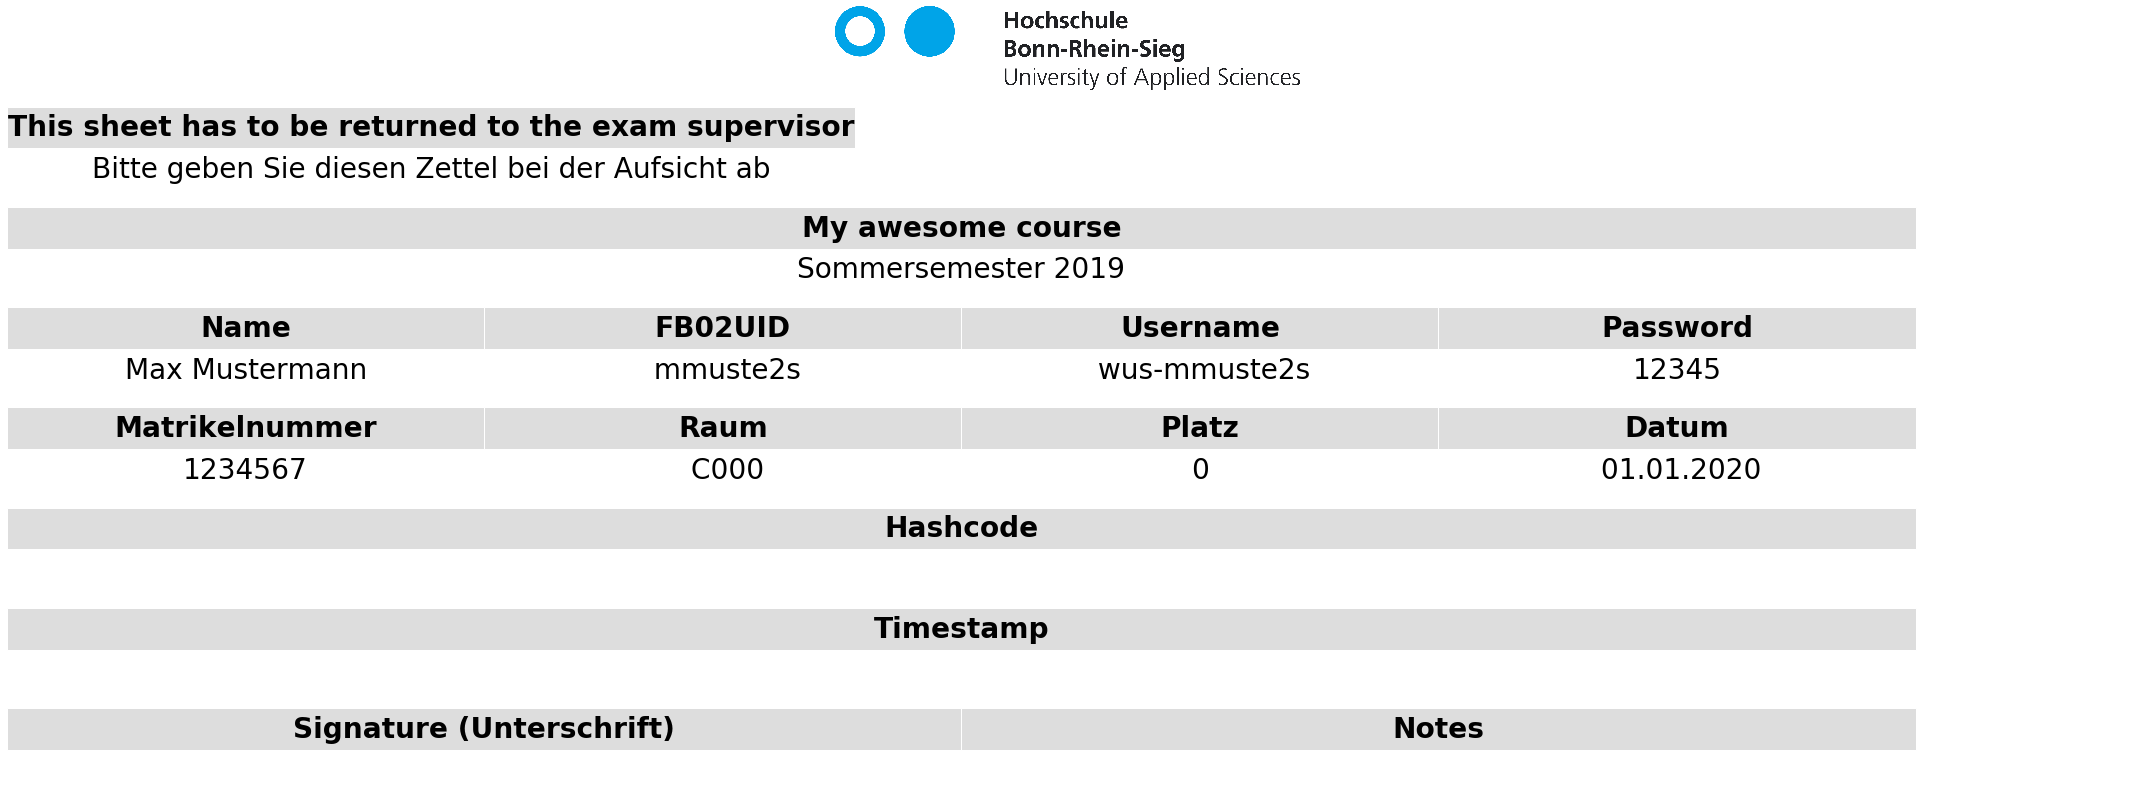

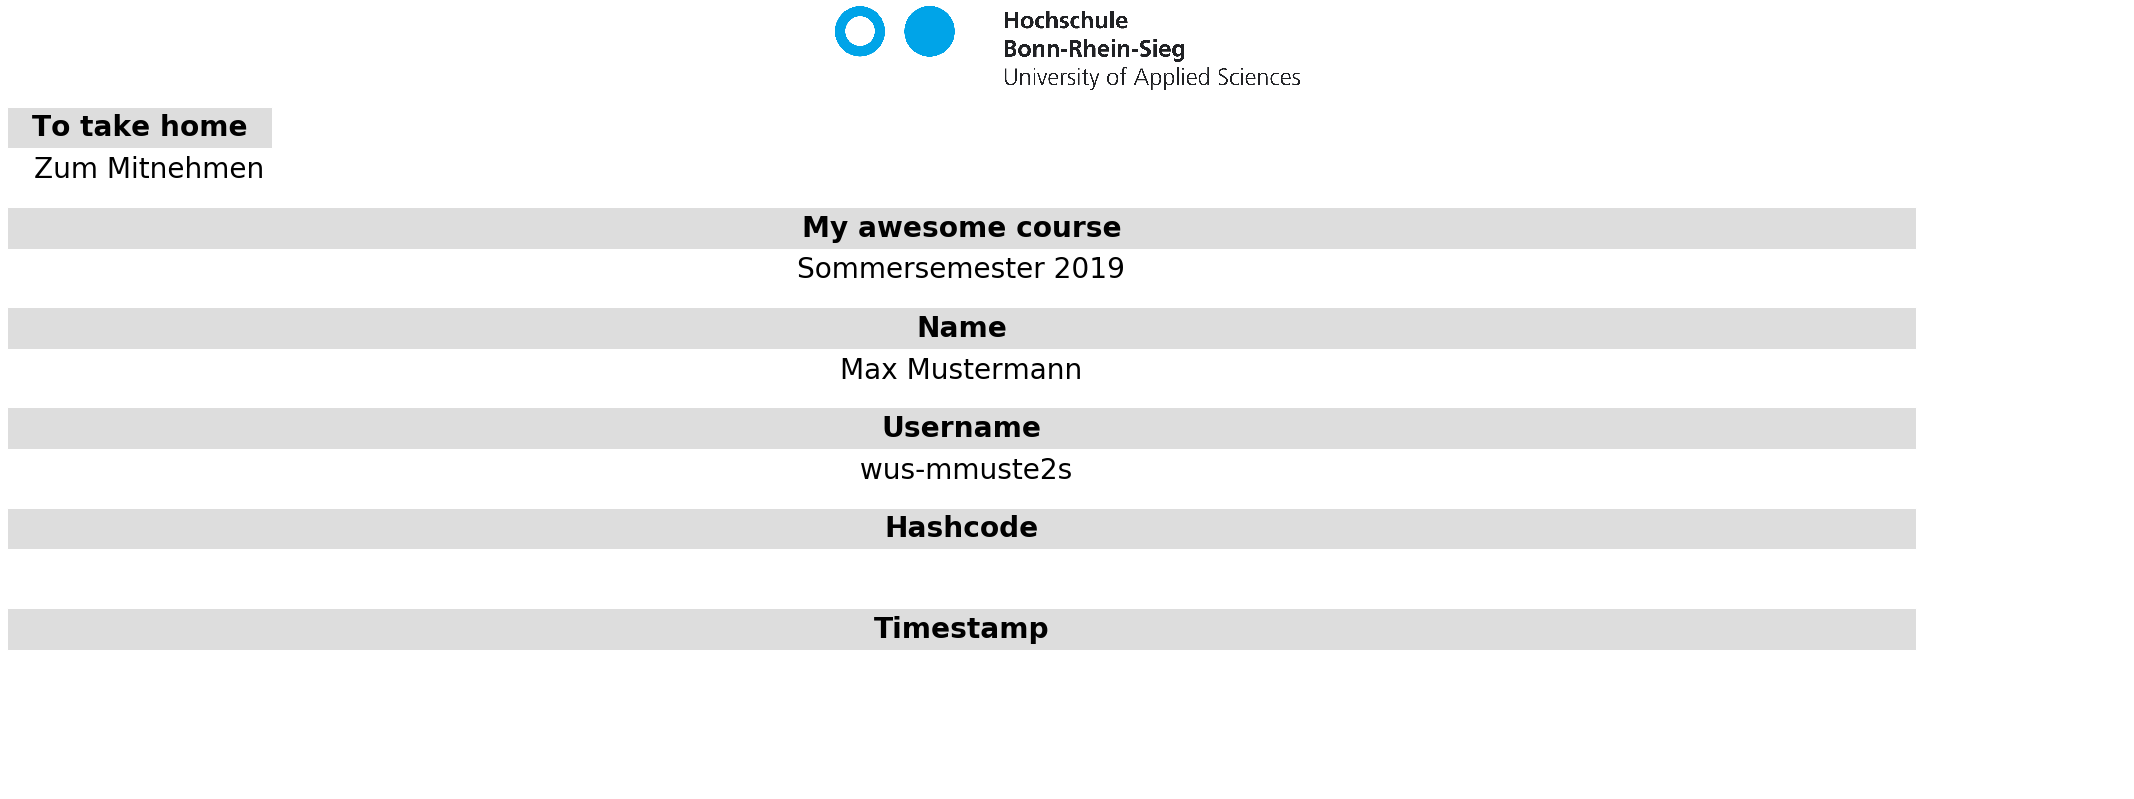

In [2]:
csv_student_list_file = 'examples/student_exam_data.csv'
exam_sheet_file = 'examples/student_exam_sheet.pdf'

course_name = 'My awesome course'
semester = 'Sommersemester 2019'
generate_exam_sheets(course_name, semester,
                     csv_student_list_file,
                     exam_sheet_file)

# Verify login for all users
#### Automatic login verification for all users
#### Usage: specify the server and the user list (in csv) where one of the columns has Name, FB02UID, Username, Password

In [160]:
import os
import argparse
import yaml
import requests
import pandas as pd

def check_login(login_url, username, password, timeout=5.0):
    try:
        response = requests.post(login_url, data={'username': username, 'password': password}, timeout=timeout)
    except requests.ReadTimeout:
        print("timeout after {} seconds when trying to log in user '{}' at URL '{}'".format(timeout, username, login_url))
        return False

    if response.status_code != 200:
        print("failed to send POST request for user '{}' to URL '{}'".format(username, login_url))
        return False

    if response.text.find('Invalid username or password') > -1:
        return False

    return True

def main(server, csv_student_list):
    print('checking logins at server: ' + server)
    student_list = pd.read_csv(csv_student_list)
    login_url = os.path.join(server, 'hub', 'login?next=')
    for i in range(len(student_list)):
        name = student_list.Name[i]
        fb02uid = student_list.FB02UID[i]
        username = student_list.Username[i]
        password = student_list.Password[i]
        
        if check_login(login_url, username, password):
            print("login successful: '{}'".format(username))
        else:
            print("login failed: '{}'".format(username))
    print ("Login check is done")


In [161]:
server ='http://10.20.166.10:8000' #local server
csv_student_list = '/home/wus/resources/courses/DemoKlausur/test_list_output.csv'

In [162]:
main(server, csv_student_list)

checking logins at server: http://10.20.166.10:8000
login successful: 'demo-student12s'
login successful: 'demo-student22s'
login successful: 'demo-student32s'
login successful: 'demo-student42s'
login successful: 'demo-student52s'
login successful: 'demo-student62s'
login successful: 'demo-student72s'
login successful: 'demo-student82s'
login successful: 'demo-student92s'
login successful: 'demo-student102s'
login successful: 'demo-student112s'
login successful: 'demo-student122s'
login successful: 'demo-student132s'
login successful: 'demo-student142s'
login successful: 'demo-student152s'
login successful: 'demo-student162s'
login successful: 'demo-student172s'
login successful: 'demo-student182s'
login successful: 'demo-student192s'
login successful: 'demo-student202s'
login successful: 'demo-test1'
login successful: 'demo-test2'
login successful: 'demo-test3'
Login check is done
